# ReExam 24th of August 2022, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 5 problems each worth 8 points for a total of 40 points, to pass you need
15 points.

## Some general hints and information:
* Some problems are similar to the exam in January but changed.
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam has no anonymous exam ID due to a technical issue, however this does not mean
that the exam is not anonymous. The grading system will automatically download all the exams from Studium
and it is at this stage that they are anonymized by a randomized ID.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not use encrypted communications
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!


---
## Exam vB, PROBLEM 1
Maximum Points = 8


## Probability warmup
Let's say we have an exam question which consists of $50$ yes/no questions. 
From past performance of similar students, a randomly chosen student will know the correct answer to $N \sim \text{binom}(50,0.8)$ questions. Furthermore, we assume that the student will guess the answer with equal probability to each question they don't know the answer to, i.e. given $N$ we define $Z \sim \text{binom}(50-N,1/2)$ as the number of correctly guessed answers. Define $Y = N + Z$, i.e., $Y$ represents the number of total correct answers.

We are interested in setting a deterministic threshold $T$, i.e., we would pass a student at threshold $T$ if $Y \geq T$. Here $T \in \{0,1,2,\ldots,50\}$.

1. [3p] Produce a simulation of $1000$ students. Hint: Simulate $N$ first then simulate $Y \mid N$ and add the results. Numpy has `numpy.random.binomial` which you can simulate from.
2. [3p] For each threshold $T$, produce a simulation as above and estimate the probability that the student *knows* less than $40$ correct answers given that the student passed, i.e., $N < 40$. Put the answer in `problem11_probabilities` as a list.
3. [2p] What is the smallest value of $T$ such that if $Y \geq T$ then we are 90\% certain that $N \geq 40$?

In [121]:
import numpy as np

# Part 1:

# Generate N array with known correct answers for each student
N = np.random.binomial(50, 0.8, size=1000)

# Create array with the number of unknown answers (to be guessed) for each student, based on above
n_unknown = np.full(shape=N.shape, fill_value=50) - N

# Generate Z array with simulated number of correct guesses on remaining questions
Z = []
for n in n_unknown:
    nb_correct_guesses = np.random.binomial(n, 0.5, size=1)
    Z.append(nb_correct_guesses[0])
    
Z = np.array(Z)

# Create Y array by adding results
Y = N + Z

problem1_1000_samples = Y
print(problem1_1000_samples)

[47 44 48 48 42 43 47 42 38 46 47 45 46 47 48 44 45 48 44 44 46 44 43 46
 46 46 48 46 43 48 46 45 44 43 44 43 46 48 42 45 46 45 44 47 46 48 47 42
 47 48 44 45 46 48 46 46 42 45 46 44 43 45 43 43 48 44 45 45 44 46 45 44
 44 42 41 47 46 45 45 47 44 47 45 46 47 45 47 44 45 46 42 45 42 44 44 45
 48 44 40 44 44 46 44 44 46 43 47 43 47 44 47 46 46 44 47 45 39 42 45 49
 45 43 48 47 45 42 48 40 41 44 47 45 48 46 48 48 49 45 44 46 42 49 45 49
 46 46 40 46 44 49 40 45 47 45 47 46 46 48 49 43 45 48 49 45 45 41 46 47
 45 45 45 43 44 45 43 49 44 44 44 47 47 49 47 47 47 46 45 41 47 46 43 46
 46 40 42 43 48 47 45 45 46 46 43 45 43 45 46 47 46 43 44 48 44 45 45 45
 44 45 46 46 47 44 44 41 43 45 44 44 43 46 41 47 46 39 46 48 44 46 45 46
 46 43 43 46 44 42 41 46 48 45 48 45 45 42 48 44 46 42 47 38 44 47 43 46
 44 48 41 48 43 41 47 43 43 47 47 45 48 47 47 44 44 44 44 46 47 46 44 43
 47 46 44 45 47 42 42 45 46 44 46 45 45 48 45 42 47 45 47 48 42 48 44 49
 44 47 45 46 45 45 44 45 45 42 46 47 48 46 45 47 43

In [30]:

# Part 2: 
# replace XXX to represent P(N < 40) for T = [0,1,2,...,50], i.e. your answer should be a list
# of length 51.

# Generate threshold values and create empty list to store probabilities
T_list = list(range(51))
proba_list = []

# Iterate through all T values
for t in T_list:
    
    # Run the same simulation as above
    N = np.random.binomial(50, 0.8, size=1000)
    n_unknown = np.full(shape=N.shape, fill_value=50) - N

    Z = []
    for n in n_unknown:
        nb_correct_guesses = np.random.binomial(n, 0.5, size=1)
        Z.append(nb_correct_guesses[0])
    
    Z = np.array(Z)
    Y = N + Z
    
    # Put the Y and N values together
    Y_N_comb = np.column_stack((Y, N))
    
    # Count all the students that meet the criteria of N < 40 given they passed
    meets_condition = 0
    for student in Y_N_comb:
        if student[0] >= t and student[1] < 40:
            meets_condition += 1
            
    proba_list.append(meets_condition / 1000)

problem1_probabilities = proba_list

In [119]:
print(problem1_probabilities)

[0.415, 0.43, 0.404, 0.399, 0.425, 0.403, 0.42, 0.401, 0.402, 0.428, 0.424, 0.4, 0.423, 0.409, 0.437, 0.418, 0.424, 0.422, 0.422, 0.425, 0.418, 0.391, 0.421, 0.411, 0.405, 0.432, 0.399, 0.389, 0.437, 0.41, 0.426, 0.411, 0.395, 0.415, 0.433, 0.415, 0.425, 0.41, 0.424, 0.404, 0.402, 0.384, 0.348, 0.302, 0.24, 0.143, 0.066, 0.029, 0.001, 0.002, 0.0]


In [120]:

# Part 3: Give an integer between 0 and 50 which is the answer to 2.

from Utils import epsilon_bounded

# Take the complement of the probabilities above
proba_array = np.array(proba_list)
proba_complement = np.ones(shape=proba_array.shape) - proba_array

# Find the first element with probability at least 0.9
required_T = np.argmax(proba_complement >= 0.9)

problem1_T = required_T

# NOTE: Doing the confidence interval not required

# Calculate epsilon using Hoeffdings and subtract this from every probability in the array
epsilon = epsilon_bounded(1000, 1, 0.1)
proba_array_conf = proba_complement - epsilon
with_conf = np.argmax(np.array(proba_array_conf) >= 0.9)

print(problem1_T, with_conf)

46 47


---
## Exam vB, PROBLEM 2
Maximum Points = 8


In many areas of data science and machine learning we need to produce random samples in different ways. This can be done to compute difficult integrals or validate algorithms. 

1. [2p] Produce 1000 samples from the distribution below using inversion sampling
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \sin(x), & 0 < x < \pi/2 \\
        1, & x \geq \pi/2
    \end{cases}
$$
and show your result with a histogram "You can use sagemath function `histogram`, or `matplotlib.pyplot` `hist`". Also what is the true density? Provide a plot of the true density between 0 and $\pi/2$.
2. [3p] Consider a random variable $X \sim F$ sampled from distribution $F$. Your goal is to estimate $E[X]$. Do this by producing 1000 different experiments, each sampling 1000 samples from $X$ and compute the empirical mean. Provide the $0.025$ and the $0.975$ quantile of the experiments.
3. [3p] Use Hoeffdings inequality to produce a 95% confidence interval for the estimated mean above?

In [122]:
# put your samples in the variable samples

# Generate random uniform sequence
U = np.random.uniform(size=10000)

# Do the inverse sampling by taking the inverse of F(x) and passing in U as arguments
# NOTE: This will generate a density function, not a distribution function
F_inv = []
for sample in U:
    if sample <= 0:
        F_inv.append(0)
    elif sample > 0 and sample < np.pi / 2:
        F_inv.append(np.arcsin(sample))
    else:
        F_inv.append(1)

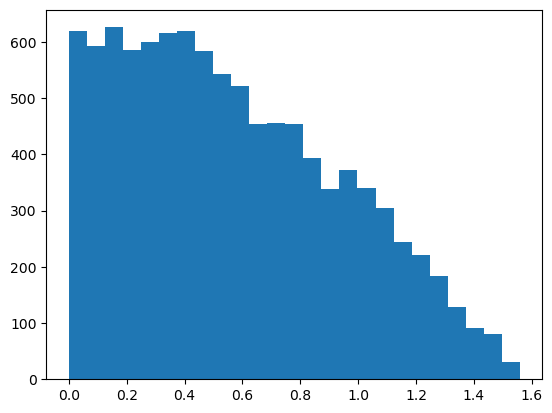

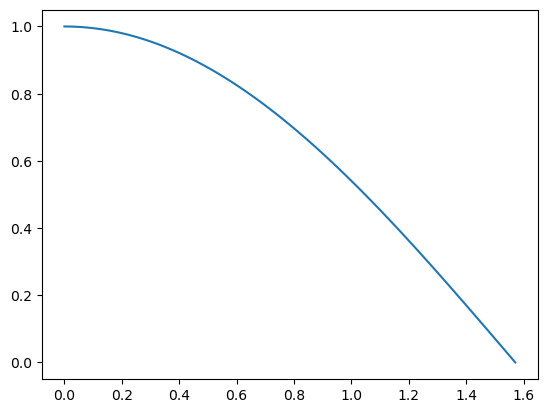

In [123]:
import matplotlib.pyplot as plt

# Plot the inverse sampled values, f^(-1)
plt.hist(F_inv, bins=25)
plt.show()

# Generate the true distribution and compare

# Values for which f(x) is defined 
f_true_input = np.linspace(0, np.pi / 2, 100)

# True density function; note that this is the derivative of F(X), hence cos(x) instead of sin(x)
f_true = [np.cos(i) for i in f_true_input]

# Plot the true density
plt.plot(f_true_input, f_true)
plt.show()

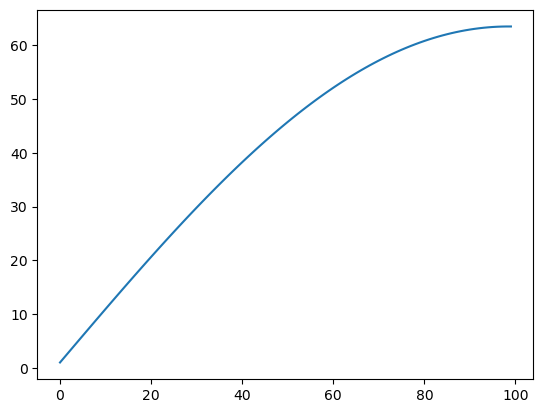

In [124]:
# The cumulative distribution function is sin(x) for the values in f^(-1)
F_true = [np.sin(i) for i in F_inv]
plt.plot(np.cumsum(f_true))
plt.show()

In [128]:
# Produce 1000 experiments, in which each experiment you draw
# 1000 samples from F. Store the value of the empirical mean of each
# experiment and compute the 0.025 and the 0.975 quantiles

# Create list to store mean values
empirical_means = []
samples = []

# Run 1000 expirements
for i in range(1000):
    
    # Generate 1000 samples
    outcomes = np.random.choice(F_inv, size=1000)
    samples.append(outcomes)
    
    # Compute the empirical mean and append
    empirical_means.append(np.mean(outcomes))

means = empirical_means # the computed empirical means, should be a list of length 1000
quantile_0025 = np.quantile(means, 0.025) # the 0.025 quantile
quantile_0975 = np.quantile(means, 0.975) # the 0.975 quantile

print(quantile_0025, quantile_0975)

0.5465302212384794 0.593740231398576


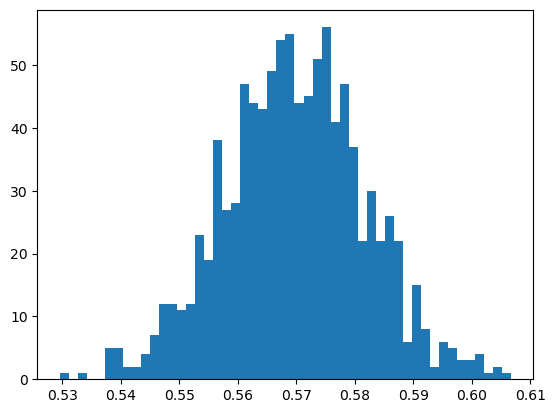

In [127]:
# Plot distribution of means

plt.hist(empirical_means, bins=50)
plt.show()

In [129]:
# Assuming that we want a confidence interval around the mean of means
mean_of_means = np.mean(means)

# Calculate the epsilon to be used
epsilon_2 = epsilon_bounded(1000, np.pi / 2, 0.05)
lower, upper = mean_of_means - epsilon_2, mean_of_means + epsilon_2 

# Put your interval in the form
l_edge = lower # The left edge of the interval
r_edge = upper # The right edge of the interval
print("Confidence interval around the mean is [%.2f,%.2f]" % (l_edge,r_edge))

Confidence interval around the mean is [0.50,0.64]


---
## Exam vB, PROBLEM 3
Maximum Points = 8


## Concentration of measure

As you recall, we said that concentration of measure was simply the phenomenon where we expect that the probability of a large deviation of some quantity becoming smaller as we observe more samples: [8/22 points per correct answer]

1. Which of the following will exponentially concentrate, i.e. for some $C_1,C_2,C_3,C_4 $ 
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq C_1 e^{-C_2 n \epsilon^2} \wedge C_3 e^{-C_4 n (\epsilon+1)} \enspace .
$$

    1. The empirical mean of i.i.d. sub-Gaussian random variables?
    2. The empirical mean of i.i.d. sub-Exponential random variables?
    3. The empirical mean of i.i.d. bounded random variables?
    4. The empirical variance of i.i.d. bounded random variables?
    5. The empirical mean of i.i.d. random variables with finite variance?
    6. The empirical variance of i.i.d. random variables with finite variance?
    7. The empirical variance of i.i.d. sub-Gaussian random variables?
    8. The empirical third moment of i.i.d. bounded random variables?
    9. The empirical fourth moment of i.i.d. sub-Gaussian random variables?
    10. The empirical mean of i.i.d. deterministic random variables?
    11. The empirical tenth moment of i.i.d. Bernoulli random variables?

2. Which of the above will concentrate in the weaker sense, that for some $C_1$
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq \frac{C_1}{n \epsilon^2}?
$$

In [ ]:

# Answers to part 1, which of the alternatives exponentially concentrate, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_1 = [1, 2, 3, 4, 7, 10, 11]

A. Exponentially concentrated by Theorem 3.13
<br><br>
B. Exponentially concentrated by Theorem 3.14
<br><br>
C. By Lemma 3.15, a bounded RV is sub-Gaussian, so 3.13 applies
<br><br>
D. The variance of a sub-Gaussian RV is sub-exponential, by Lemma 3.15
<br><br>
E. Finite variance is not strict enough for exponential concentration to hold
<br><br>
F. Same as E
<br><br>
G. The variance of a sub-Gaussian RV is sub-exponential
<br><br>
H. For the third moment and higher, the exponential concentration property does not hold
<br><br>
I. Same as H
<br><br>
J. This RV will only take one value, so it's "already concentrated"
<br><br>
K. Bernoulli is a bounded RV, hence it's sub-Gaussian. Due to it's stricter properties, e.g. bounded variance, it seems all moments exponentially concentrate

In [ ]:

# Answers to part 2, which of the alternatives concentrate in the weaker sense, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_2 = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11]

All statistics that exponentially concentrate will also concentrate in the weaker sense. 
<br><br>
E. Any RV will be concentrated in this sense (Chebychev's theorem). However, does not apply to their other moments (F).
<br><br>
All moments of a sub-Gaussian RV seem to concentrate. That does not seem to be true for sub-exponential RVs, except for the empirical mean.

---
## Exam vB, PROBLEM 4
Maximum Points = 8


In this problem you will be working with a text file `a_sequence.txt`, found in the `data` folder. This contains a sequence of numbers that are observations of a Markov chain. The goal of this exercise is to analyze this sequence in different ways.

1. [2p] Take the file `a_sequence.txt` and load it as a list of integers. Use bash or something to figure out how to parse the file.
2. [2p] Define a Markov chain from this list of integers
    1. What are the states?
    2. How many states are there?
3. [2p] Estimate the transition probability of going from state 42 to state 16?
4. [2p] Find the transition matrix $P$ and compute the matrix power $P^{10} v$ where $v = (1,0,\ldots,0)$.

In [283]:

# Read the file a_sequence.txt and load it as a list of integers. 
# Put your result in the variable "numbers"

with open("data/a_sequence.txt", mode="r") as file:
    numbers = file.readlines()

numbers = numbers[0].split(" ")
numbers = [int(nb) for nb in numbers]

print(len(numbers))
print(numbers[:20])

10000
[0, 60, 42, 16, 9, 20, 7, 66, 86, 33, 94, 19, 72, 93, 51, 93, 86, 10, 90, 65]


In [ ]:

# Construct a Markov chain of this list of integers, that is. 
# EXPLAIN in text what are the states are and what 
# the transition probabilities mean.

#---------Put your explanation between the lines-------------

# The states are represented by different integers between 0 and 99
# Each state is a realization of the random variable X_t, such that
# X_t = mu_i
# The transition probabilities describe the probabilities of
# transitioning between all possible combinations of states.
# For example, the probability that state 5 is followed by state 23,
# that is, X_t = 5 and X_t+1 = 23.

#------------------------------------------------------------

In [284]:
# put the number of states in the variable n_states

n_states = len(set(numbers))

# Now fill in the states, stored as a sorted list of integers
states = list(sorted(set(numbers)))

print(n_states)
print(states)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
# Estimate the transition probability of going from $42$ to $16$. 
# You can use the below function if you want

In [285]:
def makeFreqDict(myDataSeq, one = int(1)):
    '''Make a frequency mapping out of a sequence of data - list, array, str.

    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''

    freqDict = {} # start with an empty dictionary

    for res in myDataSeq:

        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + one #int(1) # add 1 to the count
        else: # the data value does not exist as a key value
            # add a new key-value pair for this new data value, frequency 1
            freqDict[res] = one

    return freqDict # return the dictionary created

In [286]:
transitions = []

for i in range(len(numbers) - 1):
    transitions.append((numbers[i], numbers[i + 1]))

In [287]:
print(transitions[:10])

[(0, 60), (60, 42), (42, 16), (16, 9), (9, 20), (20, 7), (7, 66), (66, 86), (86, 33), (33, 94)]


In [288]:
# Create a transition matrix, since we have 100 states we will have a 100x100 dimensioned matrix
transition_matrix = np.zeros(shape=(100, 100))

# Count frequences that the transitions occur 
freq_list = makeFreqDict(transitions)

In [ ]:
# Add counts to the transition matrix
for i in range(100):
    for j in range(100):
        if (i, j) in freq_list:
            transition_matrix[i, j] = freq_list[(i, j)]
        else:
            transition_matrix[i, j] = 0

# Divide each count by the row sum, to get probabilities betwee 0-1 summing up to 1
for i in range(100):
    transition_matrix[i, :]= transition_matrix[i, :] / np.sum(transition_matrix[i, :])

# Estimate the transition probability of going from 42 to 16.
# Put your answer here for the transition probability
transition_probability = transition_matrix[42, 16]

print(transition_probability)

In [274]:
print(freq_list)

{(0, 60): 3, (60, 42): 2, (42, 16): 4, (16, 9): 3, (9, 20): 2, (20, 7): 4, (7, 66): 2, (66, 86): 2, (86, 33): 1, (33, 94): 1, (94, 19): 1, (19, 72): 1, (72, 93): 3, (93, 51): 1, (51, 93): 2, (93, 86): 2, (86, 10): 5, (10, 90): 2, (90, 65): 4, (65, 52): 1, (52, 97): 2, (97, 26): 2, (26, 68): 1, (68, 58): 2, (58, 56): 2, (56, 52): 1, (52, 45): 3, (45, 84): 4, (84, 78): 4, (78, 55): 2, (55, 12): 1, (12, 69): 3, (69, 17): 3, (17, 67): 3, (67, 38): 1, (38, 71): 2, (71, 90): 2, (90, 96): 1, (96, 44): 2, (44, 39): 2, (39, 6): 2, (6, 41): 1, (41, 39): 3, (39, 21): 2, (21, 27): 2, (27, 65): 1, (65, 59): 1, (59, 88): 4, (88, 76): 3, (76, 2): 1, (2, 1): 1, (1, 1): 1, (1, 97): 4, (97, 16): 2, (16, 81): 4, (81, 28): 1, (28, 68): 2, (68, 73): 2, (73, 76): 1, (76, 11): 2, (11, 25): 2, (25, 86): 4, (86, 83): 2, (83, 59): 4, (59, 50): 3, (50, 61): 1, (61, 24): 1, (24, 55): 2, (55, 13): 3, (13, 78): 1, (78, 35): 3, (35, 74): 5, (74, 60): 2, (60, 24): 3, (24, 90): 2, (90, 44): 3, (44, 36): 2, (36, 65): 1

In [290]:
# Add counts to the transition matrix
for i in range(100):
    for j in range(100):
        if (i, j) in freq_list:
            transition_matrix[i, j] = freq_list[(i, j)]
        else:
            transition_matrix[i, j] = 0

# Divide each count by the row sum, to get probabilities betwee 0-1 summing up to 1
for i in range(100):
    transition_matrix[i, :]= transition_matrix[i, :] / np.sum(transition_matrix[i, :])

# Estimate the transition probability of going from 42 to 16.
# Put your answer here for the transition probability
transition_probability = transition_matrix[42, 16]

print(transition_probability)

0.04


In [291]:
transition_matrix

array([[0.        , 0.00909091, 0.01818182, ..., 0.00909091, 0.02727273,
        0.        ],
       [0.01162791, 0.01162791, 0.04651163, ..., 0.04651163, 0.        ,
        0.        ],
       [0.        , 0.00884956, 0.02654867, ..., 0.01769912, 0.00884956,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00961538],
       [0.        , 0.01754386, 0.00877193, ..., 0.00877193, 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0125    , 0.0125    ,
        0.025     ]])

In [282]:
# Check that each row sums to approx 1

row_sums = []
for row in transition_matrix:
    row_sums.append(np.sum(row))
    
print(row_sums)

[0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0000000000000002, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0000000000000002, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999998,

In [296]:
# Fill in the transition matrix P as a numpy array of 
# shape (n_states x n_states)
# Make sure it is a transition matrix by checking the column sum
P = transition_matrix

# If our initial vector is
v = np.zeros(n_states)
v[0] = 1

# What is P^10 v
steady_state_v = (np.matrix(P) ** 10) @ v

print(steady_state_v)

[[0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.01090219 0.01090219
  0.01090219 0.01090219 0.01090219 0.01090219 0.

In [298]:
for i in range(10):
    res = (np.matrix(P) ** i) @ v
    print(res)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
[[0.         0.01162791 0.         0.         0.02884615 0.00980392
  0.         0.         0.02439024 0.         0.01       0.03061224
  0.         0.00980392 0.01904762 0.         0.01052632 0.01010101
  0.01941748 0.01904762 0.02830189 0.03669725 0.         0.
  0.02970297 0.0075188  0.01098901 0.         0.01098901 0.01869159
  0.00943396 0.05434783 0.02777778 0.02       0.         0.01098901
  0.         0.01149425 0.01       0.         0.         0.
  0.         0.         0.01030928 0.         0.00952381 0.
  0.         0.         0.03191489 0.         0.03809524 0.01851852
  0.02150538 0.02970297 0.01       0.         0.02272727 0.01886792
  0.01282051 0.         0.011111

---
## Exam vB, PROBLEM 5
Maximum Points = 8


## SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the `SMS Spam Collection Dataset` and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a `list` of `tuples` with the first position in the tuple being the SMS text and the second being a flag `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. (This is precision)
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.
2. [3p] Estimate the probability that the word "free" or "prize" is in the text given that it is spam. (This is recall) I.e. estimate
$$
    \mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1) \enspace .
$$
3. [2p] Provide a "90\%" interval of confidence around the true probability from **part 1**. I.e. use the Hoeffding inequality to obtain for your estimate $\hat P$. Find $l > 0$ such that the following holds:
$$
    \mathbb{P}(\hat P - l \leq \mathbb{E}[\hat P] \leq \hat P + l) \geq 0.9 \enspace .
$$

**Solutions**

1. The conditional probability $\mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X)$ is given by the formula

$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) = 
    \frac{\mathbb{P}(Y = 1 \cap \text{"free" or "prize" is in } X)}{\mathbb{P}(\text{"free" or "prize" is in } X)}
$$

2. The conditional probability $\mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1)$ is given by the formula

$$
    \mathbb{P}(\text{"free" or "prize" is in } X \mid Y = 1) = 
    \frac{\mathbb{P}(Y = 1 \cap \text{"free" or "prize" is in } X)}{\mathbb{P}(Y = 1)}
$$ 

3. Hoeffding's inequality for the binomial case is given by 

$$
 \mathbb{P}(\bar{X}_n - \delta \leq p \geq \bar{X}_n + \delta) \geq 1 - \alpha
$$ 

and 

$$
    \delta = \frac{1}{\sqrt{n}}\sqrt{\frac{1}{2}ln(\frac{2}{\alpha})}
$$

In [198]:
# Run this cell to get the SMS text data
from exam_extras import load_sms
spam_no_spam = load_sms()

In [199]:
# Format data in the right way

spam_no_spam = [(text.lower().split(), label) for (text, label) in spam_no_spam]

In [200]:
print(spam_no_spam[0])

(['go', 'until', 'jurong', 'point,', 'crazy..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'cine', 'there', 'got', 'amore', 'wat...'], 0)


In [210]:
# Calculate the conditional probability P(Y = 1 | free or prize in X)

# Keywords to look for
spam_keywords = ["free", "prize"]

# Filter lines for those containing keywords + those with keywords and labeled spam 
keyword_lines = [(text, label) for (text, label) in spam_no_spam if any(keyword in text for keyword in spam_keywords)]
keyword_spam_lines = [(text, label) for (text, label) in keyword_lines if label == 1]

# Calculate conditional probability as the ratio between len of those lists
cond_proba_1 = len(keyword_spam_lines) / len(keyword_lines)
cond_proba_1

problem5_hatP = cond_proba_1

In [206]:
# Calculate the conditional probability P(free or prize in X | Y = 1)

# Filter lines for those containing spam
spam_lines = [(text, label) for (text, label) in spam_no_spam if label == 1]

# Calculate conditional probability
cond_proba_2 = len(keyword_spam_lines) / len(spam_lines)

problem5_hatP2 = cond_proba_2
print(problem5_hatP2)

0.2717536813922356


In [204]:

# fill in the estimate for hatP for the double free question in part 2 here (should be a number between 0 and 1)
problem5_hatP2 = cond_proba_2

In [211]:

# fill in the calculated l from part 3 here
n_spam_and_keywords = len(keyword_spam_lines)
alpha = 0.1
delta = (1 / np.sqrt(n_spam_and_keywords)) * np.sqrt((1 / 2) * np.log(2 / alpha))

problem5_l = delta
print(problem5_l)
print(problem5_hatP - problem5_l, problem5_hatP + problem5_l)

0.08589907403507749
0.7261009259649226 0.8978990740350775
